In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Repaso de clases y herencia en Python

    class BaseClass:
      Body of base class
    class DerivedClass(BaseClass):
      Body of derived class

In [ ]:
class Polygon(object):
    def __init__(self, lados): # Crear una instancia de la clase
        self.n = lados
        self.lados = [0 for i in range(lados)]

    def inputSides(self): # Definir la longitud de los lados
        self.lados = [float(input("Enter side "+str(i+1)+" : ")) for i in range(self.n)]

    def dispSides(self): # Muestra la longitud definida en pantalla
        for i in range(self.n):
            print("Side",i+1,"is",self.lados[i])

In [ ]:
p = Polygon(4)

In [ ]:
p.inputSides()

In [ ]:
p.dispSides()

¿Mejorable? 
* Verificar cantidad de lados
* Verificar longitudes positivas
* Verificar que las medidas den bien

In [ ]:
class Triangle(Polygon):
    def __init__(self):
        super().__init__(3)

    def findArea(self):
        a, b, c = self.lados
        # calculate the semi-perimeter
        s = (a + b + c) / 2
        area = (s*(s-a)*(s-b)*(s-c)) ** 0.5
        print('The area of the triangle is %0.2f' %area)

In [ ]:
t = Triangle() # No requiere la cantidad de lados, es un triangulo! 

In [ ]:
t.findArea()

In [ ]:
t.inputSides()

In [ ]:
t.findArea()

# 1 - Evaluar modelos

Dada la clase RegressionMetric como base y la métrica de $R^2$, implementar:

* MAE
* MSE
* RMSE

Como clases que heredan de RegressionMetric.

In [ ]:
class RegressionMetric(object):
    def __init__(self,ytrue,yhat):
        self.yhat = yhat
        self.ytrue = ytrue
    def __call__(self):
        NotImplemented

In [ ]:
class r2(RegressionMetric):
    def __call__(self):
        self.ymean = np.mean(self.ytrue)
        return 1 - np.sum((self.ytrue - self.yhat)**2)/np.sum((self.ytrue - self.ymean)**2)
    

In [ ]:
m = r2(np.array([1,2,3]),    np.array([1.1,2.1,3.1]))

In [ ]:
m()

In [ ]:
m.ymean, m.ytrue, m.yhat

In [ ]:
class MAE(RegressionMetric): # Mean Absolut Error
    def __call__(self):
        return np.sum(abs(self.ytrue - self.yhat))/len(self.ytrue)

class MSE(RegressionMetric): # Mean Square Error
    def __call__(self):
        return np.sum((self.ytrue - self.yhat)**2)/len(self.ytrue)

class RMSE(RegressionMetric): # Root Mean Square Error
    def __call__(self):
        return np.sqrt(np.sum((self.ytrue - self.yhat)**2)/len(self.ytrue))

In [ ]:
m1 = MAE(np.array([1,2,3]),    np.array([1.1,2.1,3.1]))
m2 = MSE(np.array([1,2,3]),    np.array([1.1,2.1,3.1]))
m3 = RMSE(np.array([1,2,3]),    np.array([1.1,2.1,3.1]))

In [ ]:
m1()

In [ ]:
m2()

In [ ]:
m3()

# 2 - Modelo lineal en numpy

## 2.a - Regresión lineal con ordenada

Tomando como base el ejercicio 5 de la clase 3, modificar la función lineal para que ofrezca la posibilidad de ajustar con término independiente. 

In [ ]:
def regresion_lineal(x,y,ti):
    if ti:
        a = np.ones((x.shape[0],1))
        x_aug = np.hstack((a,x))
    else:
        x_aug = x
    x_inv = np.linalg.pinv(x_aug.T @ x_aug)
    w = x_inv @ x_aug.T @ y
    return w

In [ ]:
data = np.loadtxt('./clase3v2.csv', delimiter = ';')

def remove_nan_row(data):
    d = data[~np.isnan(data).any(axis=1), :]
    return d

d = remove_nan_row(data)
d.shape

In [ ]:
x = d[:,:6]
y = d[:,6]
w = regresion_lineal(x,y,True)
w

## 2.b - Regresión polinómica
Tomando el ejercicio anterior. Modificar la función para que permita ajustar polinomios de grado N a elección del usuario. 

In [1]:
def regresion_polinomica(x,y,n):
    x_aug = x
    for i in range(n+1):
        if i < n:
            x_aug = np.hstack((x_aug,x))
        x_aug[:,i] = x_aug[:,i]**i
    x_inv = np.linalg.pinv(x_aug.T @ x_aug)
    w = x_inv @ x_aug.T @ y
    return w

In [ ]:
data = np.loadtxt('./clase3v2.csv', delimiter = ';')

def remove_nan_row(data):
    d = data[~np.isnan(data).any(axis=1), :]
    return d

d = remove_nan_row(data)
d.shape

In [ ]:
x = d[:,:6]
y = d[:,6]
w = regresion_polinomica(x,y,3)
w

# 3 - Modelos como clases

Tomando como ejemplo el ejercicio 1, crear una clase "BaseModel" que tenga, al menos, los métodos fit y predict. El primero calculará la media de la variable de salida, y el segundo siempre retorna ese valor como predicción.

Reimplementar 2a y 2b como clases que hereda de BaseModel.

In [ ]:
class BaseModel():
    NotImplemented
class LinearRegression():
    NotImplemented
class PolynomialRegression():
    NotImplemented

# 4 - Probar lo implementado

Dados los siguientes datos:

In [4]:
xline = np.linspace(-5,5,200)
idx = np.random.randint(0,200,50)
x = xline[idx]
np.random.seed(12)
np.random.randint(1,10,5)

array([7, 2, 3, 4, 4])

In [5]:
y = 7 + 2 * x + 3 * x**2 + 4 * x**3 + 4 * x**4

In [6]:
x.shape, y.shape

((50,), (50,))

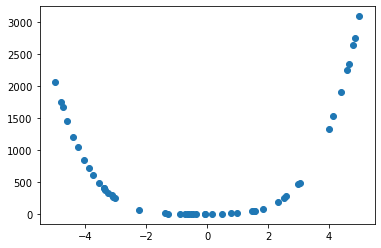

In [7]:
plt.scatter(x,y)
plt.show()

**Modelar con los 3 modelos y calcular las métricas.** 

**BaseModel**

**LinearRegression**

**PolynomialRegression**

In [44]:
xspace = np.linspace(-5,5,50)
xaug = np.array([xspace**0,xspace**1,xspace**2,xspace**3,xspace**4]).T
#w = regresion_polinomica(x.reshape((50,1)),y.reshape((50,1)),4)
w = regresion_polinomica(x.reshape((50,1)),y.reshape((50,1)),4)
w = w.reshape((5,))

In [45]:
xaug.shape, w.shape

((50, 5), (5,))

In [46]:
yhat = xaug @ w
yhat.shape

(50,)

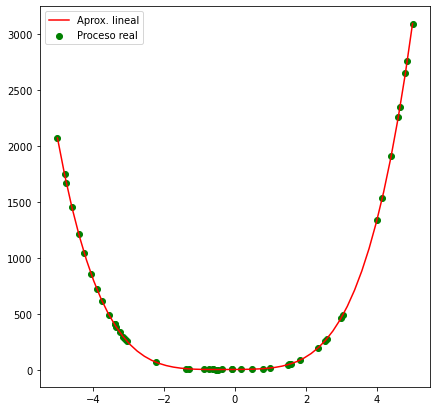

In [47]:
f, ax = plt.subplots(figsize=(7,7))

#ax.scatter(xsample[:,1],ysample, label='Muestra con ruido')
ax.scatter(x,y, color='green', label='Proceso real') # Calculado arriba
ax.plot(xspace[:],yhat, color='red', label='Aprox. lineal')
plt.legend()
plt.show()

In [48]:
w

array([7., 2., 3., 4., 4.])